<a href="https://colab.research.google.com/github/Ria-K912/QML-HEP-Tasks/blob/main/QGNN_1st_circuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pytorch-lightning
!pip install torch-geometric
!pip install energyflow
!pip install tensorcircuit
!pip install jax
!pip install jaxlib
!pip install torch-cluster

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.6/931.6 kB 54.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink

In [2]:
!pip install tensorcircuit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.0/342.0 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.1/244.1 kB 26.9 MB/s eta 0:00:00


In [6]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 115.2 MB/s eta 0:00:00


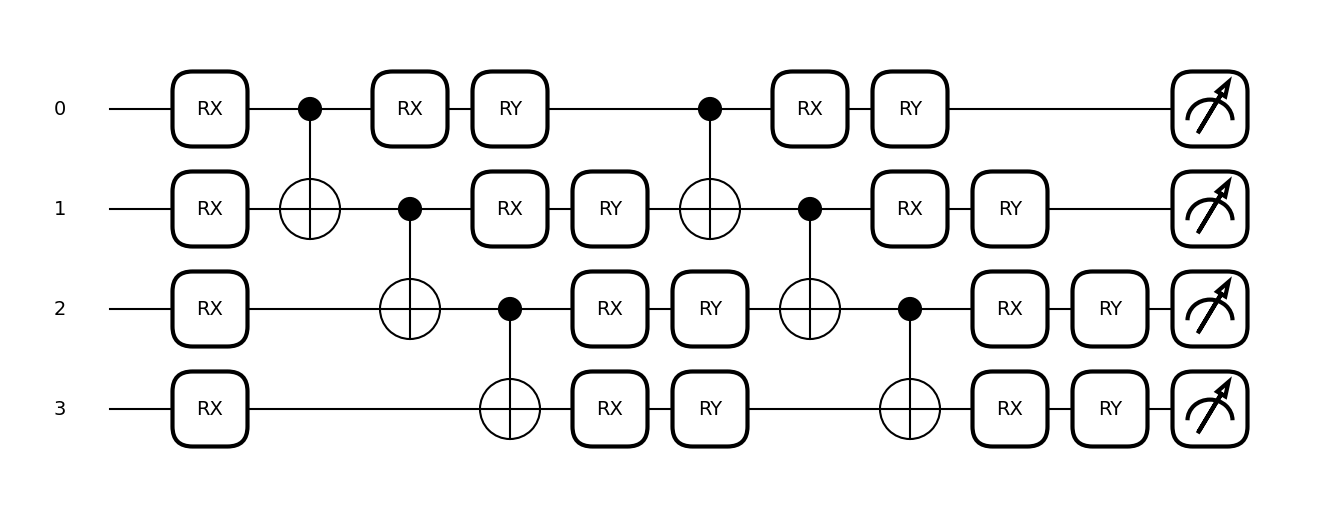

In [7]:
import pennylane as qml
import torch
import numpy as np
import matplotlib.pyplot as plt

# Define Quantum Device
nqubits = 4  # Number of qubits
nlayers = 2  # Number of layers
dev = qml.device('default.qubit', wires=nqubits)

# Define Quantum Circuit
@qml.qnode(dev)
def qgnn_circuit(x, weights):
    """Quantum circuit for encoding jet features."""

    # Encode input features as rotations
    for i in range(nqubits):
        qml.RX(x[i], wires=i)

    # Apply entanglement layers
    for j in range(nlayers):
        for i in range(nqubits - 1):
            qml.CNOT(wires=[i, i + 1])  # CNOT entanglement
        for i in range(nqubits):
            qml.RX(weights[2 * j, i], wires=i)
            qml.RY(weights[2 * j + 1, i], wires=i)

    # Return expectation values
    return [qml.expval(qml.PauliZ(i)) for i in range(nqubits)]

# Generate Sample Data
x_sample = torch.tensor([0.1, 0.5, 0.2, 0.7], dtype=torch.float32)  # Example jet feature encoding
weights_sample = torch.randn((2 * nlayers, nqubits), dtype=torch.float32)  # Random quantum weights

# Draw the circuit using PennyLane
fig, ax = qml.draw_mpl(qgnn_circuit)(x_sample, weights_sample)
plt.show()


In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
import torch_geometric
import torch_geometric.transforms as T
from torch_geometric.data import DataLoader, Data
from torch_geometric.nn import global_mean_pool, knn_graph
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import energyflow as ef
import tensorcircuit as tc
import jax.numpy as jnp

# ============================================
# 🔹 Setup Device & Backend
# ============================================
tc.set_backend("jax")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ============================================
# 🔹 Load Quark-Gluon Jet Dataset
# ============================================
print("Loading dataset...")
qg_dataset = ef.qg_jets.load(num_data=1000, pad=True, ncol=4, generator='pythia')
x = qg_dataset[0]  # Jet features (pT, y, phi, energy)
y = torch.tensor(qg_dataset[1], dtype=torch.long)  # Labels: 0 (Gluon), 1 (Quark)

# ============================================
# 🔹 Convert to Graph Representation (k-NN)
# ============================================
def construct_graph(jet_features, label, k=5):
    """
    Converts a jet (list of particles) into a graph using k-NN connectivity.
    """
    num_particles = jet_features.shape[0]
    node_features = torch.tensor(jet_features, dtype=torch.float)

    # Construct k-NN graph edges
    edge_index = knn_graph(node_features, k=k, loop=False)

    return Data(x=node_features, edge_index=edge_index, y=torch.tensor([label], dtype=torch.long))

# Convert entire dataset
jet_graphs = [construct_graph(x[i], y[i], k=5) for i in range(len(x))]

# Train/Test Split
train_data, val_data = train_test_split(jet_graphs, test_size=0.1, random_state=42)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
val_loader = DataLoader(val_data, batch_size=128, shuffle=False)

# ============================================
# 🔹 Define Quantum Circuit (QGNN Encoder)
# ============================================
def get_circ(nqubits, nlayers, x, weights):
    """Quantum circuit for encoding jet features"""
    c = tc.Circuit(nqubits)
    for i in range(nqubits):
        c.rx(i, theta=x[i])
    for j in range(nlayers):
        for i in range(nqubits - 1):
            c.cnot(i, i + 1)
        for i in range(nqubits):
            c.rx(i, theta=weights[2 * j, i])
            c.ry(i, theta=weights[2 * j + 1, i])
    return c

def circuit_wrapper(nqubits, nlayers):
    """Quantum function wrapped for PyTorch"""
    def qpred(x, weights):
        circuit = get_circ(nqubits, nlayers, x, weights)
        return tc.backend.real(jnp.array([circuit.expectation_ps(z=[i]) for i in range(nqubits)]))

    qpred_vmap = tc.backend.vmap(qpred, vectorized_argnums=0)
    qpred_batch = tc.interfaces.torch_interface(qpred_vmap, jit=True)

    return qpred_batch

# ============================================
# 🔹 Define Quantum GNN Layers
# ============================================
class QuantumNet(nn.Module):
    def __init__(self, nqubits, nlayers):
        super().__init__()
        self.q_weights = torch.nn.Parameter(torch.randn([2 * nlayers, nqubits]))
        self.qpred_batch = circuit_wrapper(nqubits, nlayers)

    def forward(self, inputs):
        return self.qpred_batch(inputs, self.q_weights)

class QGCNConv(torch_geometric.nn.GCNConv):
    def __init__(self, in_channels, out_channels, nlayers=1, **kwargs):
        super().__init__(in_channels, out_channels, **kwargs)
        self.lin = QuantumNet(in_channels, nlayers)

# ============================================
# 🔹 Define Quantum Graph Neural Network
# ============================================
class GNNModel(nn.Module):
    def __init__(self, c_in, c_hidden, c_out, num_layers=2, layer_name="QGCN", **kwargs):
        super().__init__()
        gnn_layer = QGCNConv

        layers = []
        in_channels, out_channels = c_in, c_hidden
        for _ in range(num_layers - 1):
            layers.append(gnn_layer(in_channels, out_channels, nlayers=2, bias=False, **kwargs))
            in_channels = c_hidden
        layers.append(gnn_layer(in_channels, c_out, nlayers=2, bias=False, **kwargs))
        self.layers = nn.ModuleList(layers)

    def forward(self, x, edge_index):
        for l in self.layers:
            x = l(x, edge_index)
        return x

class GraphGNNModel(nn.Module):
    def __init__(self, c_in, c_hidden, c_out, **kwargs):
        super().__init__()
        self.embed = nn.Linear(c_in, c_hidden)
        self.GNN = GNNModel(c_in=c_hidden, c_hidden=c_hidden, c_out=c_hidden, **kwargs)
        self.head = nn.Sequential(nn.Linear(c_hidden, c_out))

    def forward(self, x, edge_index, batch_idx):
        x = self.embed(x)
        x = self.GNN(x, edge_index)
        x = global_mean_pool(x, batch_idx)  # Average pooling
        x = self.head(x)
        return x

# ============================================
# 🔹 Define PyTorch Lightning Training Module
# ============================================
class GraphLevelGNN(pl.LightningModule):
    def __init__(self, **model_kwargs):
        super().__init__()
        self.save_hyperparameters()
        self.model = GraphGNNModel(**model_kwargs)
        self.loss_module = nn.CrossEntropyLoss()

    def forward(self, batch):
        x, edge_index, batch_idx = batch.x, batch.edge_index, batch.batch
        x = self.model(x, edge_index, batch_idx)
        x = x.squeeze(dim=-1)
        preds = x.argmax(dim=-1)
        loss = self.loss_module(x, batch.y)
        acc = (preds == batch.y).sum().float() / preds.shape[0]
        return loss, acc

    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=1e-2, weight_decay=0.001)

    def training_step(self, batch, batch_idx):
        loss, acc = self.forward(batch)
        self.log('train_loss', loss, prog_bar=True)
        self.log('train_acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, acc = self.forward(batch)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

# ============================================
# 🔹 Train the Quantum GNN Model
# ============================================
def train_qgnn(model_name, num_epochs=50, **model_kwargs):
    pl.seed_everything(42)
    trainer = pl.Trainer(
        accelerator="gpu" if torch.cuda.is_available() else "cpu",
        devices=1,
        max_epochs=num_epochs,
        enable_progress_bar=True
    )
    model = GraphLevelGNN(c_in=4, c_out=2, **model_kwargs)
    trainer.fit(model, train_loader, val_loader)

# Train the model
train_qgnn(model_name="QGCN", num_epochs=50, c_hidden=6, num_layers=1)


Using device: cuda
Loading dataset...


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_su

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 13900. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (8) is smaller than the logging int

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
